# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Overview

In [2]:
data = pd.read_csv('fake reviews dataset.csv')

In [3]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
data.sample(5)

,category,rating,label,text_
31226,Books_5,3.0,CG,"This is a light read, but the characters are w..."
25953,Kindle_Store_5,4.0,OR,Kellan and Mallory's story was instalove but i...
33258,Toys_and_Games_5,5.0,CG,This was a gift and it has been a favorite. I ...
14467,Movies_and_TV_5,1.0,CG,Not at all like the original. The movie is jus...
22118,Pet_Supplies_5,5.0,CG,My pups love these! I use it as a treat in the...


In [5]:
data['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [6]:
data['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [7]:
data['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

CG : Computer Generated Review

OR : Original / Genuine Review

In [8]:
# Checking for null values 
data.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [10]:
data.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Text Preprocessing 

Stop words are words that are frequently used and considered insignificant because they don't carry much meaning. 

In [11]:
# Displaying stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Example of how tokenization works 
nltk.word_tokenize("How are you")

['How', 'are', 'you']

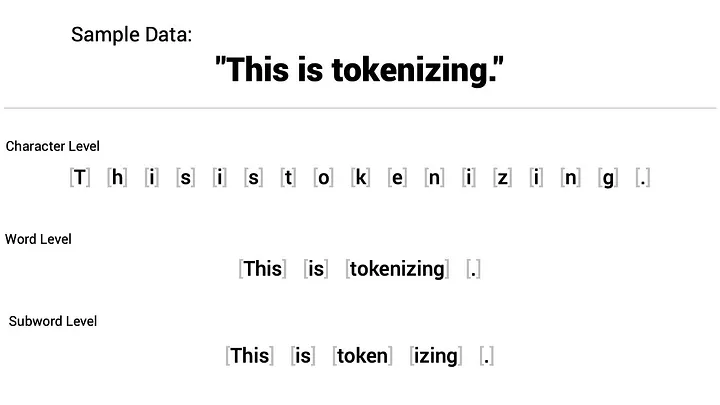

## Initialize lemmatizer and stopwords

In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

## Process each row in 'text_' column

In [14]:
for index, row in data.iterrows():
    filter_sentence = []
    sentence = row['text_']

    ## Remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenize words and remove stopwords
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if w.lower() not in stop_words]
    
    # Lemmatize words
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    
    # Update the 'text_' column with the processed words
    data.loc[index, 'text_'] = ' '.join(filter_sentence)  # Join list into a string for readability

In [15]:
# Cleaned Text/Reviews
data.text_

0        Love Well made sturdy comfortable love itVery ...
1         love great upgrade original Ive mine couple year
2                  pillow saved back love look feel pillow
3              Missing information use great product price
4                      nice set Good quality set two month
                               ...                        
40427    read review saying bra ran small ordered TWO b...
40428    wasnt sure exactly would little large small si...
40429    wear hood wear hood wear jacket without hood 3...
40430    liked nothing dress reason gave 4 star ordered...
40431    work wedding industry work long day foot outsi...
Name: text_, Length: 40432, dtype: object

## Saving the preprocessed review texts

In [16]:
# data.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

## Loading the cleaned preprocessed review text data

In [17]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,Love Well made sturdy comfortable love itVery ...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrade original Ive mine couple year
2,2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,Missing information use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set Good quality set two month


In [18]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,Love Well made sturdy comfortable love itVery ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original Ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,Missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set Good quality set two month


## Converting the reviews into lowercase

In [20]:
df['text_'] = df['text_'].str.lower()

In [21]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month


## Checking for Null values

In [22]:
df.isna().sum()

category    0
rating      0
label       0
text_       1
dtype: int64

In [23]:
df.dropna(inplace =True)

In [24]:
df.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [25]:
df['length'] = df['text_'].apply(len)

In [26]:
df.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love itvery ...,52
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original ive mine couple year,48
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow,39
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price,43
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month,35


# EDA(Exploratory Data Analysis)

## Distribution of Review Lengths by Label

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

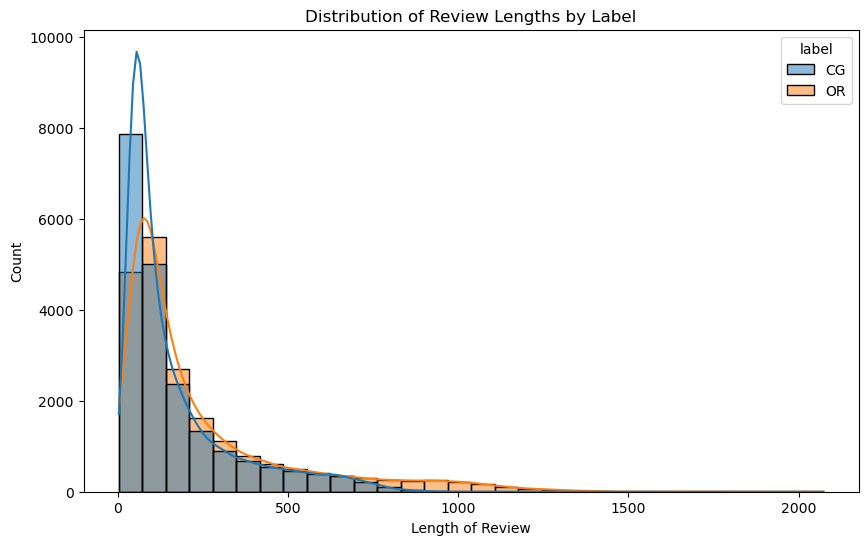

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', kde=True, bins=30)
plt.title('Distribution of Review Lengths by Label')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

## Box Plot of Review Lengths by Label

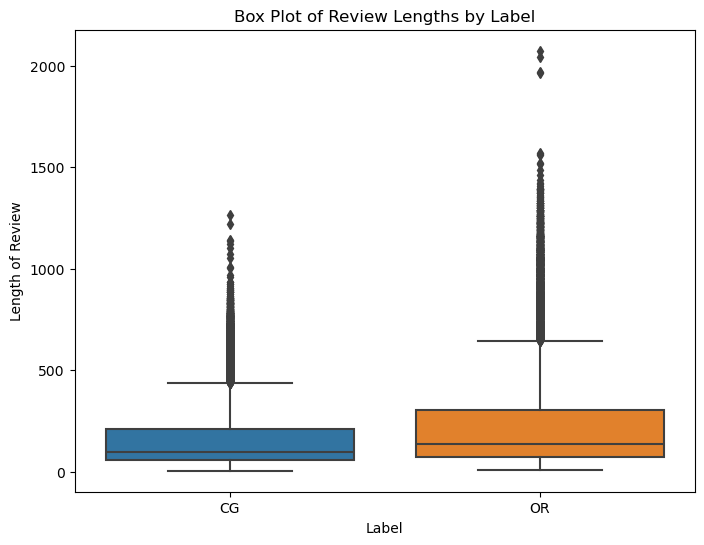

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='length')
plt.title('Box Plot of Review Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Length of Review')
plt.show()


## Count of Each Label (Computer Generated vs Original)

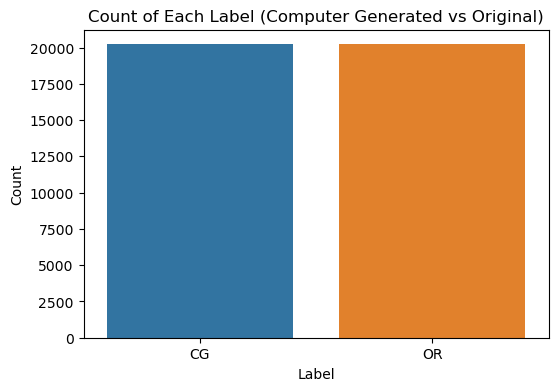

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Count of Each Label (Computer Generated vs Original)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Word Cloud Analysis of Computer Generated and Original Reviews

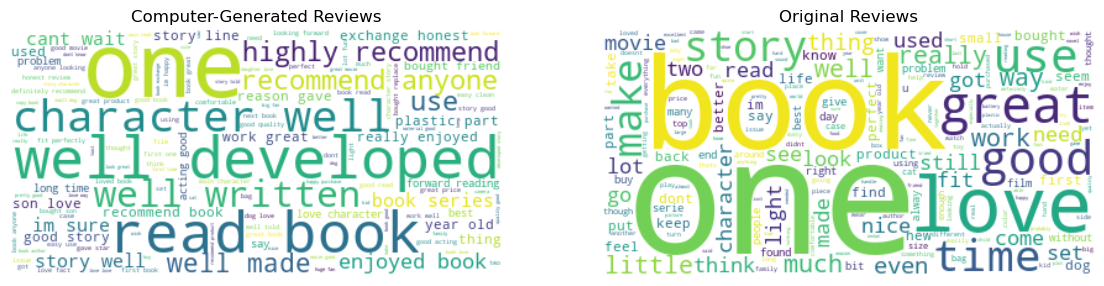

In [30]:
from wordcloud import WordCloud

# Separate text by label
cg_text = " ".join(df[df['label'] == 'CG']['text_'].astype(str))
or_text = " ".join(df[df['label'] == 'OR']['text_'].astype(str))

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(cg_text), interpolation='bilinear')
plt.title('Computer-Generated Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='white').generate(or_text), interpolation='bilinear')
plt.title('Original Reviews')
plt.axis('off')

plt.show()


Generating a word cloud for each label helps identify commonly used words in each category. This can visually highlight differences in language between computer-generated and original reviews.

## Violin Plot

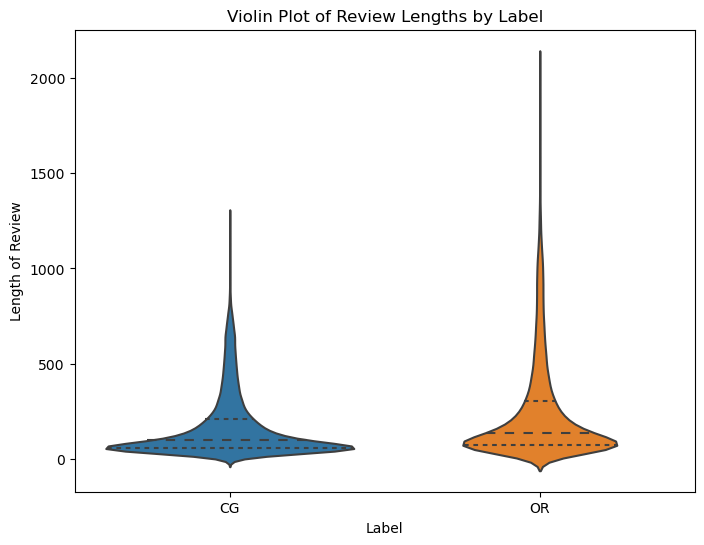

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='label', y='length', inner="quartile")
plt.title('Violin Plot of Review Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Length of Review')
plt.show()


A violin plot combines elements of box plots and density plots, showing the distribution shape, median, and quartiles for each label.

# Encoding the target variable i.e Label Column

- CG = 1
- OG = 0

In [32]:
df['label']=df.label.replace({'OR':0,'CG':1})
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_10216\2216959518.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label']=df.label.replace({'OR':0,'CG':1})


,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,1,love well made sturdy comfortable love itvery ...,52
1,Home_and_Kitchen_5,5.0,1,love great upgrade original ive mine couple year,48
2,Home_and_Kitchen_5,5.0,1,pillow saved back love look feel pillow,39
3,Home_and_Kitchen_5,1.0,1,missing information use great product price,43
4,Home_and_Kitchen_5,5.0,1,nice set good quality set two month,35


# Defining X (input variable) and Y (Target Variable)

In [33]:
x= df['text_']
y = df['label']

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(len(x_train), len(y_train))  # Both should print the same length


32344 32344


# Vectorization(TF-IDF)

In [36]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Model Selection and Training

In [38]:
from sklearn.metrics import classification_report,accuracy_score


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
y_pred_LR = LR.predict(xv_test)

In [41]:
LR.score(xv_test,y_test)

0.8737479906022011

In [42]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4069
           1       0.89      0.85      0.87      4018

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_DT = DT.predict(xv_test)

In [45]:
DT.score(xv_test,y_test)

0.7539260541609991

In [46]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4069
           1       0.75      0.76      0.76      4018

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087



## Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
RF.fit(xv_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [48]:
y_pred_RF = RF.predict(xv_test)

In [49]:
RF.score(xv_test,y_test)

0.7843452454556696

In [50]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4069
           1       0.75      0.84      0.79      4018

    accuracy                           0.78      8087
   macro avg       0.79      0.78      0.78      8087
weighted avg       0.79      0.78      0.78      8087



## Support Vector Machine

In [51]:
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(xv_train, y_train)


LinearSVC()

In [52]:
y_pred_SVM= SVM.predict(xv_test)

In [53]:
SVM.score(xv_test,y_test)

0.8790651663163102

In [54]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4069
           1       0.88      0.88      0.88      4018

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



## Multinomial Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)

MultinomialNB()

In [56]:
y_pred_MNB= MNB.predict(xv_test)

In [57]:
MNB.score(xv_test,y_test)

0.8554470137257326

In [58]:
print(classification_report(y_test,y_pred_MNB))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4069
           1       0.82      0.90      0.86      4018

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



## K-Nearest Neighbors (KNN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xv_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred_KNN= KNN.predict(xv_test)

In [61]:
KNN.score(xv_test,y_test)

0.6232224557932484

In [62]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.87      0.30      0.44      4069
           1       0.57      0.95      0.72      4018

    accuracy                           0.62      8087
   macro avg       0.72      0.63      0.58      8087
weighted avg       0.72      0.62      0.58      8087



# Comparison of all above Algorithms


In [63]:
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_LR)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_KNN)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_DT)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_RF)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_SVM)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred_MNB)*100,2)) + '%')

Logistic Regression Prediction Accuracy: 87.37%
K Nearest Neighbors Prediction Accuracy: 62.32%
Decision Tree Classifier Prediction Accuracy: 75.39%
Random Forests Classifier Prediction Accuracy: 78.43%
Support Vector Machines Prediction Accuracy: 87.91%
Multinomial Naive Bayes Prediction Accuracy: 85.54%


# Demonstration of the App

In [64]:
# import numpy as np

# # Define the function to test a single review with all classifiers
# def test_review():
#     # Take input from the user
#     review_text = input("Enter a review text to test: ")
    
#     # Transform the review text using the TF-IDF vectorizer
#     review_vectorized = vectorization.transform([review_text])
    
#     # Store predictions from each model
#     predictions = {
#         'Logistic Regression': LR.predict(review_vectorized)[0],
#         'K Nearest Neighbors': KNN.predict(review_vectorized)[0],
#         'Decision Tree': DT.predict(review_vectorized)[0],
#         'Random Forest': RF.predict(review_vectorized)[0],
#         'Support Vector Machine': SVM.predict(review_vectorized)[0],
#         'Multinomial Naive Bayes': MNB.predict(review_vectorized)[0]
#     }
    
#     # Display the results
#     for model_name, prediction in predictions.items():
#         label = "Original Review" if prediction == 0 else "Computer Generated Review"
#         print(f'{model_name} Prediction: {label}')

# # Example usage
# test_review()


In [67]:
pip install gradio


Defaulting to user installation because normal site-packages is not writeable
  Using cached gradio-5.4.0-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.115.4-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.4.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
     ---------------------------------------- 0.0/51.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------  51.2/51.8 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 51.8/51.8 kB 296.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ------------------------ -------------- 92.2/149.4 kB 1.7 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.9.2 which is incompatible.


In [78]:
import gradio as gr

# Predefined accuracy scores for each model
accuracies = {
    'Logistic Regression': '87.37%',
    'K Nearest Neighbors': '62.32%',
    'Decision Tree': '75.39%',
    'Random Forest': '78.43%',
    'Support Vector Machine': '87.91%',
    'Multinomial Naive Bayes': '85.54%'
}

# Function to test a single review based on the selected classifier
def test_review(review_text, model_name):
    # Transform the review text using the TF-IDF vectorizer
    review_vectorized = vectorization.transform([review_text])
    
    # Get prediction from the selected model
    model = models[model_name]
    prediction = model.predict(review_vectorized)[0]
    
    # Map prediction to labels
    label = "Original Review" if prediction == 0 else "Computer Generated Review"
    return label, f"{accuracies[model_name]}"

# Dictionary to hold the models
models = {
    'Logistic Regression': LR,
    'K Nearest Neighbors': KNN,
    'Decision Tree': DT,
    'Random Forest': RF,
    'Support Vector Machine': SVM,
    'Multinomial Naive Bayes': MNB
}

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("<h1 style='text-align: center;'>Fake Review Detection System</h1>")
    
    with gr.Row():
        review_text = gr.Textbox(label="Enter Review Text", placeholder="Type a review here...")
        model_name = gr.Dropdown(choices=list(models.keys()), label="Select Model for Prediction", value="Logistic Regression")
        
    with gr.Row():
        predict_btn = gr.Button("Predict Review")
    
    result_text = gr.Textbox(label="Prediction Result", placeholder="Prediction will appear here...", interactive=False)
    accuracy_text = gr.Textbox(label="Model Accuracy", placeholder="Accuracy will appear here...", interactive=False)
    
    # Link function to button click
    predict_btn.click(fn=test_review, inputs=[review_text, model_name], outputs=[result_text, accuracy_text])

# Launch the Gradio interface
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7868
* Running on public URL: https://518ada9df7d863dc4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Saving the models using Joblib

In [75]:
# import joblib
# joblib.dump(vectorization, 'vectorizer.joblib')
# joblib.dump(LR, 'logistic_regression_model.joblib')
# joblib.dump(KNN, 'k_nearest_neighbors_model.joblib')
# joblib.dump(DT, 'decision_tree_model.joblib')
# joblib.dump(RF, 'random_forest_model.joblib')
# joblib.dump(SVM, 'support_vector_machine_model.joblib')
# joblib.dump(MNB, 'multinomial_naive_bayes_model.joblib')

# print("Models and vectorizer saved successfully!")

Models and vectorizer saved successfully!
